## Lab Assignment 2 - Multiclass classification
**Classification of Robots from their Conversation**

Jacob Wahyladi

Ethan Silver

Jay Sachar 

# Initialize General Packages 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Getting Started

In [23]:
# Load the conversation Data set 
conv_df = pd.read_csv(r"C:\Users\Jay\Documents\Github\MSE413-ML\Lab 2\Classification of Robots from their conversation sequence.csv")
print(conv_df.head(10))
X_data = conv_df.drop(columns=['Robot']) #Drop target variable
Y_data = conv_df['Robot'] #Set Y to be the target variable

   Robot   num1    num2     num3     num4      num5       num6       num7  \
0      1      2       5        2        5         6          2          1   
1      2   1747    1749     1751     1758      1765       1767       1772   
2      3  65056  195168  1561344  7806720  31226880  187361280  749445120   
3      4   2855    2860     2865     2870      2875       2880       2885   
4      5  11440   57200   286000  1430000   7150000   35750000  178750000   
5      1      4       9        5        4         8          6          6   
6      2   1487    1491     1498     1503      1512       1514       1518   
7      3  18850   18850   113100   452400    452400    1809600    3619200   
8      4   8962    8967     8972     8977      8982       8987       8992   
9      5   2870   14350    71750   358750   1793750    8968750   44843750   

           num8          num9         num10  
0  8.000000e+00  1.000000e+00  3.000000e+00  
1  1.774000e+03  1.783000e+03  1.785000e+03  
2  6.745006e+0

# 2. Decision Tree Classifier

In [24]:
#2.1 Split the dataset into training (80%) and test (20%). Consider random effects in splitting the dataset
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X_data, Y_data, test_size=0.2, random_state=42) # Not sure how to consider random effects in splitting the data tbh


In [62]:
#2.3 Evaluate and discuss the performance of the model on the test set by providing the confusion matrix and metrics of classification (accuracy, sensitivity, specificity, and f1 score).

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

def DT_metrics(y_test, x_test, x_train, y_train, depth):
    clf = DecisionTreeClassifier(max_depth=depth)
    # Train the decision tree
    clf.fit(x_train, y_train)
    
    y_pred = clf.predict(x_test) # Y_ decision tree_ predictions 

    DT_accuracy = accuracy_score(y_test, y_pred)
    DT_precision = precision_score(y_test, y_pred, average='macro')
    DT_recall = recall_score(y_test, y_pred, average='macro')
    DT_f1 = f1_score(y_test, y_pred, average='macro')
    DT_conf_matrix = confusion_matrix(y_test, y_pred,)

    print(f'Metrics for Depth = {depth}')
    print(f'Accuracy: {DT_accuracy}')
    print(f'Precision: {DT_precision}')
    print(f'Recall: {DT_recall}')
    print(f'F1-score: {DT_f1}')
    print(f'Confusion Matrix:\n{DT_conf_matrix}')
    return DT_accuracy, DT_precision, DT_recall, DT_f1, DT_conf_matrix, clf

In [63]:
#2.2 Train a decision tree classifier with default parameters and dept of 20, on the train set
DT_accuracy_depth_20, DT_precision_depth_20, DT_recall_depth_20, DT_f1_depth_20, DT_conf_matrix_depth_20, clf_depth_20 = DT_metrics(Y_test, X_test, X_train, Y_train, depth=20)

Metrics for Depth = 20
Accuracy: 0.78791
Precision: 0.8856602186584075
Recall: 0.7882824610459307
F1-score: 0.7224256351360654
Confusion Matrix:
[[19909     0     0     0     0]
 [    0    75     0 19952     0]
 [    0     1 18909     0  1256]
 [    0     0     0 20024     0]
 [    0     0     0     0 19874]]


In [43]:
# Investigate the effect of maximum depth on the accuracy of the model for the followingdepths: 1, 5, 10, 20, 50, and 100. Discuss the results.
DT_accuracy_depth_1, _, _, _, _, _ = DT_metrics(Y_test, X_train, Y_train, depth=1)
DT_accuracy_depth_5, _, _, _, _, _ = DT_metrics(Y_test, X_train, Y_train, depth=5)
DT_accuracy_depth_10, _, _, _, _, _ = DT_metrics(Y_test, X_train, Y_train, depth=10)
DT_accuracy_depth_50, _, _, _, _, _ = DT_metrics(Y_test, X_train, Y_train, depth=50)
DT_accuracy_depth_100, _, _, _, _, _ = DT_metrics(Y_test, X_train, Y_train, depth=100)



c:\Users\Jay\Documents\Github\MSE413-ML\venv\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Metrics for Depth = 1
Accuracy: 0.39783
Precision: 0.24961912198349934
Recall: 0.4
F1-score: 0.2795196061385484
Confusion Matrix:
[[19909     0     0     0     0]
 [    0     0     0     0 20027]
 [    1     0     0     0 20165]
 [    0     0     0     0 20024]
 [    0     0     0     0 19874]]
Metrics for Depth = 5
Accuracy: 0.74146
Precision: 0.8325517267333179
Recall: 0.7421159929188916
F1-score: 0.6745883365990133
Confusion Matrix:
[[19909     0     0     0     0]
 [    0    11     0 20016     0]
 [    0     1 14976     0  5189]
 [    0     0     0 20024     0]
 [    0     0   648     0 19226]]
Metrics for Depth = 10
Accuracy: 0.77575
Precision: 0.8721121785168771
Recall: 0.7762155182822239
F1-score: 0.7096987529321311
Confusion Matrix:
[[19909     0     0     0     0]
 [    0    32     0 19995     0]
 [    0     1 17764     0  2401]
 [    0     0     0 20024     0]
 [    0     0    28     0 19846]]
Metrics for Depth = 50
Accuracy: 0.80315
Precision: 0.8034139793500398
Recall: 0.80

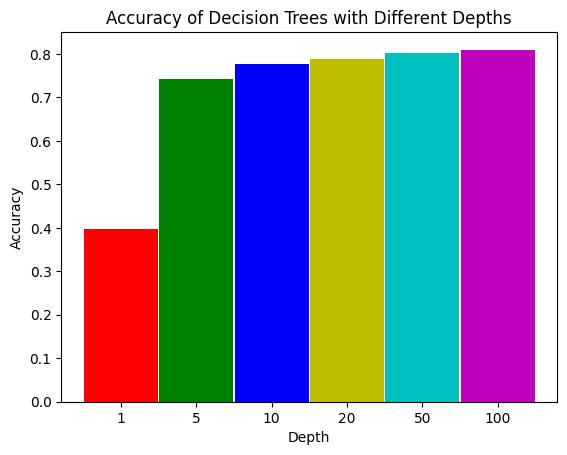

In [59]:
# Plot a bar graph comparing the depth to accuarcy
depths = [1, 5, 10, 20, 50, 100]
accuracies = [DT_accuracy_depth_1, DT_accuracy_depth_5, DT_accuracy_depth_10, DT_accuracy_depth_20, DT_accuracy_depth_50, DT_accuracy_depth_100]

colors = ['r', 'g', 'b', 'y', 'c', 'm']

bar_width = 0.98  # Width of each bar
index = np.arange(len(depths))  # Index for each depth
for i in range(len(depths)):
    plt.bar(index[i], accuracies[i], bar_width, label='Depth', color=colors[i])
# Add labels and title
plt.xlabel('Depth')
plt.ylabel('Accuracy')
plt.title('Accuracy of Decision Trees with Different Depths')
plt.xticks(index, depths)  # Set x-ticks to be the depths

# Show the plot
plt.show()

# 3. Random Forest Classifier 

In [ ]:
#3.1 Split the dataset into training (80%) and test set (20%). Consider random effects in splitting the dataset
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X_data, Y_data, test_size=0.2, random_state=42) # Not sure how to consider random effects in splitting the data tbh


In [70]:
# Create a general function to train a Random Forest Classifier at different depths and estimators
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

def RF_metrics(y_test, x_test, x_train, y_train, depth, estimators):
    RF_clf = RandomForestClassifier(n_estimators = estimators,max_depth=depth)
    # Train the Random Forest tree
    RF_clf.fit(x_train, y_train)
    
    y_pred = RF_clf.predict(x_test) # Y_ decision tree_ predictions 

    RF_accuracy = accuracy_score(y_test, y_pred)
    RF_precision = precision_score(y_test, y_pred, average='macro')
    RF_recall = recall_score(y_test, y_pred, average='macro')
    RF_f1 = f1_score(y_test, y_pred, average='macro')
    RF_conf_matrix = confusion_matrix(y_test, y_pred,)

    print(f'Metrics for Depth = {depth} and Number of Estimators = {estimators}')
    print(f'Accuracy: {RF_accuracy}')
    print(f'Precision: {RF_precision}')
    print(f'Recall: {RF_recall}')
    print(f'F1-score: {RF_f1}')
    print(f'Confusion Matrix:\n{RF_conf_matrix}')
    return RF_accuracy, RF_precision, RF_recall, RF_f1, RF_conf_matrix, RF_clf, RF_clf.feature_importances_

In [67]:
#3.2 Train a random forest classifier on the train set with a number of estimators of 20 and a max depth of 20. 
#3.3 Evaluate and discuss the performance of the model on the test set by providing the confusion matrix and metrics of classification (accuarcy, sensisitivty, specificity, and f1 score)
RF_accuracy_est_20_depth_20, RF_precision_est_20_depth_20, RF_recall_est_20_depth_20, RF_f1_est_20_depth_20, RF_conf_matrix_est_20_depth_20, RF_clf_est_20_depth_20, RF_feature_importances_est_20_depth_20  = RF_metrics(Y_test, X_test, X_train, Y_train, depth=20, estimators=20)

Metrics for Depth = 20 and Number of Estimators = 20
Accuracy: 0.807
Precision: 0.8074821766903899
Recall: 0.807299511623167
F1-score: 0.8072443728209336
Confusion Matrix:
[[19909     0     0     0     0]
 [    0 10788     0  9239     0]
 [    0     1 19393     0   772]
 [    0  9288     0 10736     0]
 [    0     0     0     0 19874]]


In [71]:
# Train different random forest classifiers with a number of estimators=[1, 10, 20,100] and maximum depths= [1, 5, 10, 20,100]

estimators = [1, 10, 20, 100]
max_depths = [1, 5, 10, 20, 100]

accuracy = {} 
results_dict = {}
for estimator in estimators:
    for depth in depths:
        # Call the RF_metrics function
        RF_accuracy, _, _, _, _, _, feature_importances = RF_metrics(Y_test, X_test, X_train, Y_train, depth, estimator)
        # Store the accuracy in the dictionary
        accuracy[f'RF_accuracy_est_{estimator}_depth_{depth}'] = RF_accuracy
        # Store feature importances in the dictionary
        results_dict[f'RF_feature_importances_est_{estimator}_depth_{depth}'] = feature_importances


c:\Users\Jay\Documents\Github\MSE413-ML\venv\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Metrics for Depth = 1 and Number of Estimators = 1
Accuracy: 0.39936
Precision: 0.25000119215455696
Recall: 0.4
F1-score: 0.28000936044384567
Confusion Matrix:
[[19909     0     0     0     0]
 [    0 20027     0     0     0]
 [    1 20165     0     0     0]
 [    0 20024     0     0     0]
 [    0 19874     0     0     0]]
Metrics for Depth = 5 and Number of Estimators = 1
Accuracy: 0.73932
Precision: 0.7454376708136329
Recall: 0.7399680758213174
F1-score: 0.6731863783866674
Confusion Matrix:
[[19909     0     0     0     0]
 [    0 19968     0    59     0]
 [    0     1 14738     0  5427]
 [    0 19968     0    56     0]
 [    0     0   613     0 19261]]
Metrics for Depth = 10 and Number of Estimators = 1
Accuracy: 0.78037
Precision: 0.7820885823482935
Recall: 0.7807679731140469
F1-score: 0.7610073301927958
Confusion Matrix:
[[19909     0     0     0     0]
 [    0 16001     0  4026     0]
 [    0     1 18277     0  1888]
 [    0 15993     0  4031     0]
 [    0     0    55     0 198

c:\Users\Jay\Documents\Github\MSE413-ML\venv\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Metrics for Depth = 1 and Number of Estimators = 10
Accuracy: 0.59807
Precision: 0.3992556558760151
Recall: 0.6
F1-score: 0.4660073752770124
Confusion Matrix:
[[19909     0     0     0     0]
 [    0     0     0 20027     0]
 [    1     0     0     1 20164]
 [    0     0     0 20024     0]
 [    0     0     0     0 19874]]
Metrics for Depth = 5 and Number of Estimators = 10
Accuracy: 0.75836
Precision: 0.7623577150965011
Recall: 0.7588746409556316
F1-score: 0.7386362838533248
Confusion Matrix:
[[19909     0     0     0     0]
 [    0  4024     0 16003     0]
 [    0     1 16606     0  3559]
 [    0  3947     0 16077     0]
 [    0     0   654     0 19220]]
Metrics for Depth = 10 and Number of Estimators = 10
Accuracy: 0.78396
Precision: 0.7854801816741014
Recall: 0.7843526587786991
F1-score: 0.7838704988755278
Confusion Matrix:
[[19909     0     0     0     0]
 [    0 10936     0  9091     0]
 [    0     1 18427     0  1738]
 [    0 10745     0  9279     0]
 [    0     0    29     0 19

c:\Users\Jay\Documents\Github\MSE413-ML\venv\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Metrics for Depth = 1 and Number of Estimators = 20
Accuracy: 0.59807
Precision: 0.3992556558760151
Recall: 0.6
F1-score: 0.4660073752770124
Confusion Matrix:
[[19909     0     0     0     0]
 [    0     0     0 20027     0]
 [    1     0     0     1 20164]
 [    0     0     0 20024     0]
 [    0     0     0     0 19874]]
Metrics for Depth = 5 and Number of Estimators = 20
Accuracy: 0.75349
Precision: 0.7574295206836714
Recall: 0.7540149289062501
F1-score: 0.746961308021828
Confusion Matrix:
[[19909     0     0     0     0]
 [    0 13506     0  6521     0]
 [    0     1 16341     0  3824]
 [    0 13651     0  6373     0]
 [    0     0   654     0 19220]]
Metrics for Depth = 10 and Number of Estimators = 20
Accuracy: 0.78735
Precision: 0.7886400558153074
Recall: 0.7877280100460128
F1-score: 0.7875207301326188
Confusion Matrix:
[[19909     0     0     0     0]
 [    0 10591     0  9436     0]
 [    0     1 18602     0  1563]
 [    0 10252     0  9772     0]
 [    0     0    13     0 198

In [ ]:
# 3.6 Using Mean Decrease in Impurity, show which feature has the highest importance in prediction

# MDI is used in the function RF_metrics, to return RF_clf_feature_importances in the results_dict. Plotting this below results in:
for estimator in estimators:
    for depth in depths:
        feature_importances = results_dict[f'RF_feature_importances_est_{estimator}_depth_{depth}']
        feature_names = X_train.columns
        sorted_indices = np.argsort(feature_importances)[::-1]
        sorted_feature_importances = feature_importances[sorted_indices]
        sorted_feature_names = feature_names[sorted_indices]

        plt.figure(figsize=(10, 6))
        plt.bar(range(len(sorted_feature_importances)), sorted_feature_importances)
        plt.xticks(range(len(sorted_feature_importances)), sorted_feature_names, rotation=90)
        plt.xlabel('Feature')
        plt.ylabel('Mean Decrease in Impurity')
        plt.title(f'Feature Importance in Random Forest Classifier (Estimators={estimator}, Depth={depth})')
        plt.show()

# 4.1 K-Nearest Neighbours (KNN)

In [ ]:
# 4.1 Split the dataset into training (80%) and test set (20%). Consider random effects in splitting the dataset
